## Contour Plot of Monthly Aviso Data

<div class="alert alert-block alert-info">
Import Necessary Modules
</div>

In [2]:
import warnings

import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

<div class="alert alert-block alert-info">
Data Import
</div>

In [3]:
# Dataset already resides in Project Folder
ds_aviso = xr.open_dataset('monthly_aviso.nc')
ds_aviso

<xarray.Dataset>
Dimensions:    (latitude: 121, longitude: 1440, time: 276)
Coordinates:
  * time       (time) datetime64[ns] 1993-01-01 1993-02-01 ... 2015-12-01
  * longitude  (longitude) float32 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
  * latitude   (latitude) float32 -14.88 -14.62 -14.38 ... 14.62 14.88 15.12
Data variables:
    sla        (time, latitude, longitude) float64 ...

In [4]:
# Take mean of data
ds_mean=ds_aviso.sla[0:276,:,:].mean(dim="time")
ds_mean

<xarray.DataArray 'sla' (latitude: 121, longitude: 1440)>
array([[0.03045882, 0.03050805, 0.03054162, ..., 0.03052089, 0.0304361 ,
        0.03042178],
       [0.03049564, 0.03054018, 0.03058837, ..., 0.03069843, 0.03056272,
        0.03049065],
       [0.0306336 , 0.03064426, 0.03068916, ..., 0.03090856, 0.03077852,
        0.03067462],
       ...,
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]])
Coordinates:
  * longitude  (longitude) float32 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
  * latitude   (latitude) float32 -14.88 -14.62 -14.38 ... 14.62 14.88 15.12

### Make Contour Plot

Text(0.5, 1.0, 'Contour of Mean SLA from 1993-2015 for 15N - 15S')

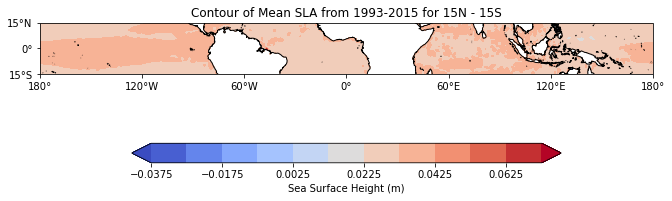

In [5]:
# Make the figure larger
fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())

# Add cyclic point to data
data=ds_mean
data, lons = add_cyclic_point(data, coord=ds_mean['longitude'])


# Make a filled contour plot
clevs=np.arange(-.0375,.075,.01)

cs=ax.contourf(lons,ds_mean['latitude'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='coolwarm',extend='both')

# Add coastlines
ax.coastlines()

# Define the xticks for longitude
ax.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(-15,16,15), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

# Add colorbar
cbar = plt.colorbar(cs,shrink=0.7,orientation='horizontal',label='Sea Surface Height (m)')

# Add title
plt.title('Contour of Mean SLA from 1993-2015 for 15N - 15S')

#### This should be zero for mean anomalies unless we are seeing a global warming signal

Try doing a regression with SLA over time to see how it is changing

In [6]:
from scipy.stats import linregress

In [7]:
ds_climo=ds_aviso.groupby('time.month').mean()
ds_anoms=ds_aviso.groupby('time.month')-ds_climo
ds_anoms

<xarray.Dataset>
Dimensions:    (latitude: 121, longitude: 1440, time: 276)
Coordinates:
  * time       (time) datetime64[ns] 1993-01-01 1993-02-01 ... 2015-12-01
  * longitude  (longitude) float32 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
  * latitude   (latitude) float32 -14.88 -14.62 -14.38 ... 14.62 14.88 15.12
    month      (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    sla        (time, latitude, longitude) float64 -0.01249 -0.01437 ... nan nan

In [8]:
# Define Lengths
nx = len(ds_aviso['longitude'])
ny = len(ds_aviso['latitude'])

# Create Array
p_array = np.zeros((ny,nx))
r_array = np.zeros((ny,nx))
m_array = np.zeros((ny,nx))

x = ds_aviso['time']

In [9]:
# Looping

for i in range(nx):
    for j in range(ny):
        
        y = ds_aviso[:,j,i]
        
        m,b,r,p,e = linregress(x,y)
        
        p_array[j,i]= p
        r_array[j,i] = r
        m_array[j,i] = m

TypeError: unhashable type: 'slice'

### Let's Try something Else

AVISO Dataset runs from 1993 - 2015, so lets take the mean of the first decade and the mean of the second decade and find the difference between them instead

In [10]:
aviso93_03 = ds_aviso.sel(time=slice('1993-1','2003-12'))
aviso93_03

<xarray.Dataset>
Dimensions:    (latitude: 121, longitude: 1440, time: 132)
Coordinates:
  * time       (time) datetime64[ns] 1993-01-01 1993-02-01 ... 2003-12-01
  * longitude  (longitude) float32 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
  * latitude   (latitude) float32 -14.88 -14.62 -14.38 ... 14.62 14.88 15.12
Data variables:
    sla        (time, latitude, longitude) float64 ...

In [11]:
aviso05_15 = ds_aviso.sel(time=slice('2005-1','2015-12'))
aviso05_15

<xarray.Dataset>
Dimensions:    (latitude: 121, longitude: 1440, time: 132)
Coordinates:
  * time       (time) datetime64[ns] 2005-01-01 2005-02-01 ... 2015-12-01
  * longitude  (longitude) float32 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
  * latitude   (latitude) float32 -14.88 -14.62 -14.38 ... 14.62 14.88 15.12
Data variables:
    sla        (time, latitude, longitude) float64 ...

In [12]:
aviso93_03mean = aviso93_03.sla[0:132,:,:].mean(dim="time")
aviso93_03mean

<xarray.DataArray 'sla' (latitude: 121, longitude: 1440)>
array([[0.01566148, 0.01541461, 0.0151908 , ..., 0.01641658, 0.01615025,
        0.01588247],
       [0.0159098 , 0.01571677, 0.01550902, ..., 0.01652606, 0.01628154,
        0.01605961],
       [0.01611622, 0.01597305, 0.01577378, ..., 0.01650614, 0.01632756,
        0.016184  ],
       ...,
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]])
Coordinates:
  * longitude  (longitude) float32 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
  * latitude   (latitude) float32 -14.88 -14.62 -14.38 ... 14.62 14.88 15.12

In [13]:
aviso05_15mean = aviso05_15.sla[0:132,:,:].mean(dim="time")
aviso05_15mean

<xarray.DataArray 'sla' (latitude: 121, longitude: 1440)>
array([[0.04642006, 0.04674623, 0.04702358, ..., 0.04608509, 0.04603364,
        0.04616927],
       [0.04633754, 0.04658429, 0.04686517, ..., 0.04650334, 0.04630135,
        0.04624644],
       [0.04640915, 0.04652444, 0.0467874 , ..., 0.04699525, 0.04672816,
        0.04651276],
       ...,
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]])
Coordinates:
  * longitude  (longitude) float32 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
  * latitude   (latitude) float32 -14.88 -14.62 -14.38 ... 14.62 14.88 15.12

In [14]:
mean_diff = aviso05_15mean - aviso93_03mean
mean_diff

<xarray.DataArray 'sla' (latitude: 121, longitude: 1440)>
array([[0.03075858, 0.03133162, 0.03183278, ..., 0.02966851, 0.02988339,
        0.0302868 ],
       [0.03042773, 0.03086752, 0.03135615, ..., 0.02997728, 0.0300198 ,
        0.03018683],
       [0.03029293, 0.03055139, 0.03101361, ..., 0.03048911, 0.0304006 ,
        0.03032876],
       ...,
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]])
Coordinates:
  * longitude  (longitude) float32 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
  * latitude   (latitude) float32 -14.88 -14.62 -14.38 ... 14.62 14.88 15.12

Text(0.5, 1.0, 'Mean Difference in Sea Level Anomalies Between the First and Last Decade')

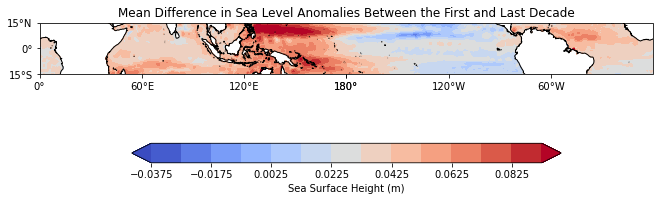

In [19]:
# Make the figure larger
fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

# Add cyclic point to data
data=mean_diff
data, lons = add_cyclic_point(data, coord=mean_diff['longitude'])


# Make a filled contour plot
clevs=np.arange(-.0375,.1,.01)

cs=ax.contourf(lons,mean_diff['latitude'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='coolwarm',extend='both')

# Add coastlines
ax.coastlines()

# Define the xticks for longitude
ax.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(-15,16,15), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

# Add colorbar
cbar = plt.colorbar(cs,shrink=0.7,orientation='horizontal',label='Sea Surface Height (m)')

# Add title
plt.title('Mean Difference in Sea Level Anomalies Between the First and Last Decade')